# **Data Processing Approach for Portfolio Project**

## **Project Title:** Song Popularity Prediction
## [Company Logo]

## **Student Name:** Oche David Ankeli

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

# **Data Sources**

**I utilized three datasets for my project:**

1. *top_songs.csv*

**Source**: Kaggle.com

**Description:** Contains data on top songs with features like Spotify Streams, YouTube Views, TikTok Posts, etc.

2. *augmented_datalab_export.csv*

**Source:** Datalabs: https://www.datacamp.com/datalab/w/d95addb3-7ac0-4e6a-bced-405a2173c940/edit


3. *tcc_ceds_music.csv*

**Source:** Research Dataset: https://data.mendeley.com


   
  ## **Data Aggregation**

Data aggregation is necessary to create a comprehensive dataset that captures various dimensions of song popularity. By combining data from these sources, we achieve the following:

1. **Broader Feature Set for Improved Predictive Power:**
   - Aggregating data provides access to a wide range of features that enhance our understanding of song popularity. For example, combining `Spotify Streams` with `TikTok Posts` and `YouTube Views` allows us to analyze how social media interactions influence streaming numbers.

2. **Enhanced Accuracy through Cross-Verification:**
   - Different sources may provide overlapping data, like `track_name`, `artist_name`, and metrics such as `Spotify Popularity`. By cross-verifying records, we can ensure higher accuracy. In cases of conflicting data (e.g., different stream counts), we prioritize the source with the most complete or recent information.

3. **Mitigation of Missing Data Issues:**
   - Each dataset might have missing values in certain columns. Aggregating data helps fill these gaps. For example, if `top_songs.csv` lacks information on `Spotify Playlist Reach`, `augmented_datalab_export.csv` might provide it, resulting in a more complete dataset.

4. **Facilitates Analysis of Correlated Variables Across Platforms:**
   - By combining social media data (`TikTok Posts`, `TikTok Views`), streaming metrics (`Spotify Streams`, `YouTube Views`), and song attributes (`danceability`, `energy`), we can study correlations and trends across platforms. This allows us to identify patterns that wouldn’t be visible within a single dataset.

### **Methodology for Data Aggregation:**
To combine these datasets:
- **Key Columns**: I’ll use `track_name` and `artist_name` as primary keys for merging datasets.
- **Handling Duplicates and Conflicts**: When columns such as `Spotify Streams` or `TikTok Posts` appear in multiple datasets, I’ll prioritize datasets with more recent or complete data.
- **Data Cleaning**: I’ll standardize column formats and clean inconsistencies (e.g., ensuring uniform spelling and capitalization in song titles) to prevent mismatches.

By aggregating these diverse datasets, we create a robust, multi-dimensional dataset that captures various factors influencing song popularity. This enriched dataset will provide more reliable input for predictive modeling.



Summary statistics of the dataset:
        Track Score  Spotify Streams  Spotify Playlist Count  \
count  4000.000000      4000.000000             4000.000000   
mean      0.033614         0.110431                0.105266   
std       0.057330         0.127717                0.123290   
min       0.000000         0.000000                0.000000   
25%       0.005824         0.018962                0.012254   
50%       0.015483         0.063356                0.059998   
75%       0.037962         0.154378                0.152262   
max       1.000000         1.000000                1.000000   

       Spotify Playlist Reach  Spotify Popularity  YouTube Views  \
count             4000.000000         4000.000000    4000.000000   
mean                 0.095352            0.663525       0.025957   
std                  0.116775            0.155504       0.043602   
min                  0.000000            0.000000       0.000000   
25%                  0.021016            0.652632      

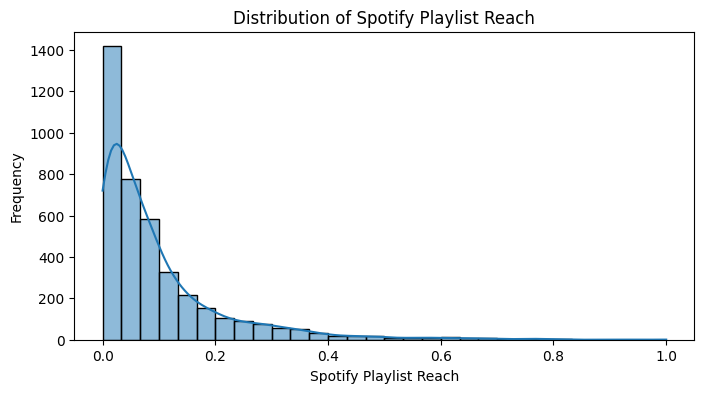

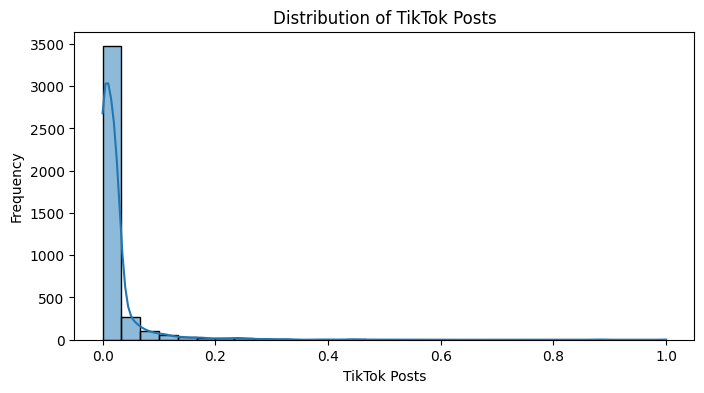

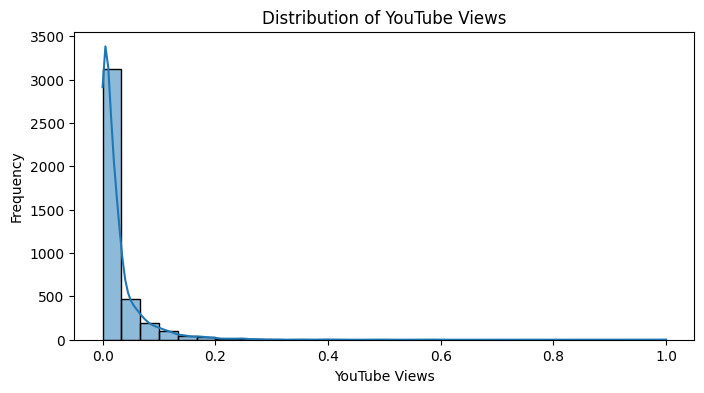

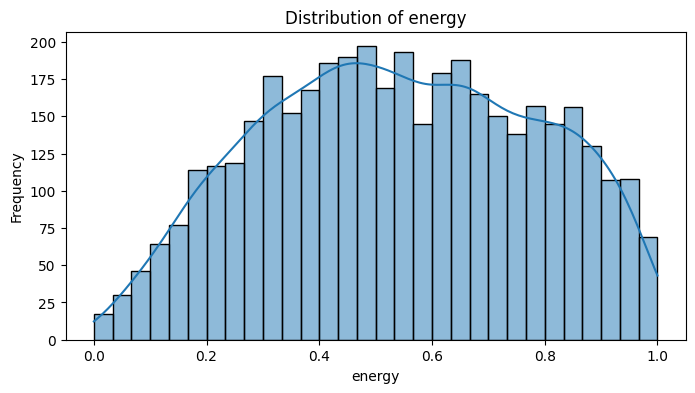


Remaining Missing Values:
 Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
SiriusXM Spins                0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Soundcloud Streams            0
Shazam Counts                 0
Explicit Track                0
bpm                           0
dB                            0
live                          0
len                           0
danceability                  0
feelings                      0
energy                        0
High_Potential                0
dtype: int64

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Load the datasets
top_songs = pd.read_csv('/content/cleaned_top_songs.csv', encoding='ISO-8859-1')
datalab = pd.read_csv('/content/augmented_datalab_export.csv')
tcc_ceds = pd.read_csv('/content/tcc_ceds_music.csv')

# Target column for analysis
target_column = 'High_Potential'

# =Select Relevant Columns
top_songs_relevant = top_songs[
    [
        "Track Score", "Spotify Streams", "Spotify Playlist Count", "Spotify Playlist Reach",
        "Spotify Popularity", "YouTube Views", "YouTube Likes", "TikTok Posts", "TikTok Likes",
        "TikTok Views", "YouTube Playlist Reach", "Apple Music Playlist Count", "AirPlay Spins",
        "SiriusXM Spins", "Deezer Playlist Count", "Deezer Playlist Reach", "Amazon Playlist Count",
        "Pandora Streams", "Pandora Track Stations", "Soundcloud Streams", "Shazam Counts",
        "Explicit Track", target_column
    ]
]

# Select relevant columns from additional datasets
datalab_relevant = datalab[['bpm', 'dB', 'live']]
tcc_ceds_relevant = tcc_ceds[['len', 'danceability', 'feelings', 'energy']]

# 4,000 Rows because i want it to be faster due to the size
max_rows = 4000
top_songs_relevant = top_songs_relevant.head(max_rows)
datalab_relevant = datalab_relevant.head(max_rows).reset_index(drop=True)
tcc_ceds_relevant = tcc_ceds_relevant.head(max_rows).reset_index(drop=True)

# Handle Missing Values with KNN Imputation
imputer = KNNImputer(n_neighbors=5)
top_songs_imputed = pd.DataFrame(imputer.fit_transform(top_songs_relevant), columns=top_songs_relevant.columns)

# Concatenate All Relevant Datasets
combined_data = pd.concat([top_songs_imputed, datalab_relevant, tcc_ceds_relevant], axis=1)

#  Ensure 'High_Potential' is the Last Column
# This step rearranges columns to keep 'High_Potential' as the last column
columns = [col for col in combined_data.columns if col != target_column] + [target_column]
combined_data = combined_data[columns]

# Normalize Features
# Apply MinMaxScaler only to the feature columns (excluding the target column)
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(combined_data.drop(columns=[target_column])), columns=columns[:-1])
normalized_features[target_column] = combined_data[target_column].values

# Summary Statistics
print("\nSummary statistics of the dataset:\n", normalized_features.describe())

# Visualize Distributions of Key Features
key_features = ["Spotify Playlist Reach", "TikTok Posts", "YouTube Views", "energy"]
for feature in key_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(normalized_features[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

#  Final Check for Missing Values
missing_summary = normalized_features.isnull().sum()
print("\nRemaining Missing Values:\n", missing_summary)

#  Save the Processed Dataset
normalized_features.to_csv('processed_song_dataset_final.csv', index=False)

# Inspect the Final Dataset
print("\nProcessed Dataset Info:")
print(normalized_features.info())
print(normalized_features.head())




2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 **Your answer for data transformation goes here **
 ### Dataset Overview

I’m working with three datasets (`top_songs`, `datalab`, and `tcc_ceds`), all in CSV format, and each brings unique features to the table:

- **`cleaned_top_songs.csv`**: This dataset contains detailed song attributes and includes a target column called `High_Potential`, which indicates whether a song has high potential.
- **`datalab_export.csv`**: It focuses on numerical features like `bpm`, `dB`, and `live`, which describe various aspects of a song's acoustics.
- **`tcc_ceds_music.csv`**: This dataset covers features such as `len`, `danceability`, `feelings`, and `energy`, offering insights into the song's characteristics.

### Planned Transformation

To prepare these datasets for analysis and modeling, I plan to merge and clean the data as follows:

1. **Concatenation**: I’ll combine all three datasets horizontally (`axis=1`) using `pd.concat()` to ensure that I retain all features from each dataset.
2. **Handling Missing Data**:
   - I’ll address any missing values introduced during the merging process (`NaN` values).
   - Columns or rows with too many missing values will be dropped.
   - For the remaining missing values, I’ll use imputation methods like mean, median, or mode.
3. **Data Cleaning**:
   - I’ll make sure the feature names are consistent.
   - Duplicates will be removed.
   - Units across features will be standardized where necessary.
4. **Normalization**: I’ll scale numerical features like `bpm`, `dB`, and `danceability` to a consistent range to improve comparability.


3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
  **Insert code for data exploration below**

### Data Exploration

As I explore the datasets, here’s what each one offers:

- **`cleaned_top_songs.csv`**: Includes features like the song name, artist, genre, and the target column `High_Potential`, which indicates whether a song has high potential.
- **`augmented_datalab_export.csv`**: Contains numerical attributes such as `bpm`, `dB`, and `live`.
- **`tcc_ceds_music.csv`**: Adds more song characteristics, including `len`, `danceability`, `feelings`, and `energy`.

#### Exploratory Data Analysis (EDA)
For the EDA, I’ll focus on a few key aspects:

1. **Distributions**: I’ll analyze the distribution of numerical variables like `bpm`, `dB`, and `energy`, as well as examine the balance of the target variable, `High_Potential`.
2. **Correlations**: I’ll look for relationships between features, paying special attention to those that are strongly correlated with `High_Potential`.
3. **Outliers**: I’ll identify and evaluate any extreme values in the numerical features that might affect the analysis.


Data Source Format:
- 'cleaned_top_songs.csv' (CSV Format)
- 'augmented_datalab_export.csv' (CSV Format)
- 'tcc_ceds_music.csv' (CSV Format)

Combined Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track Score                 4000 non-null   float64
 1   Spotify Streams             4000 non-null   float64
 2   Spotify Playlist Count      4000 non-null   float64
 3   Spotify Playlist Reach      4000 non-null   float64
 4   Spotify Popularity          4000 non-null   float64
 5   YouTube Views               4000 non-null   float64
 6   YouTube Likes               4000 non-null   float64
 7   TikTok Posts                4000 non-null   float64
 8   TikTok Likes                4000 non-null   float64
 9   TikTok Views                4000 non-null   float64
 10  YouTube Playlist Reach      4000 non-nu

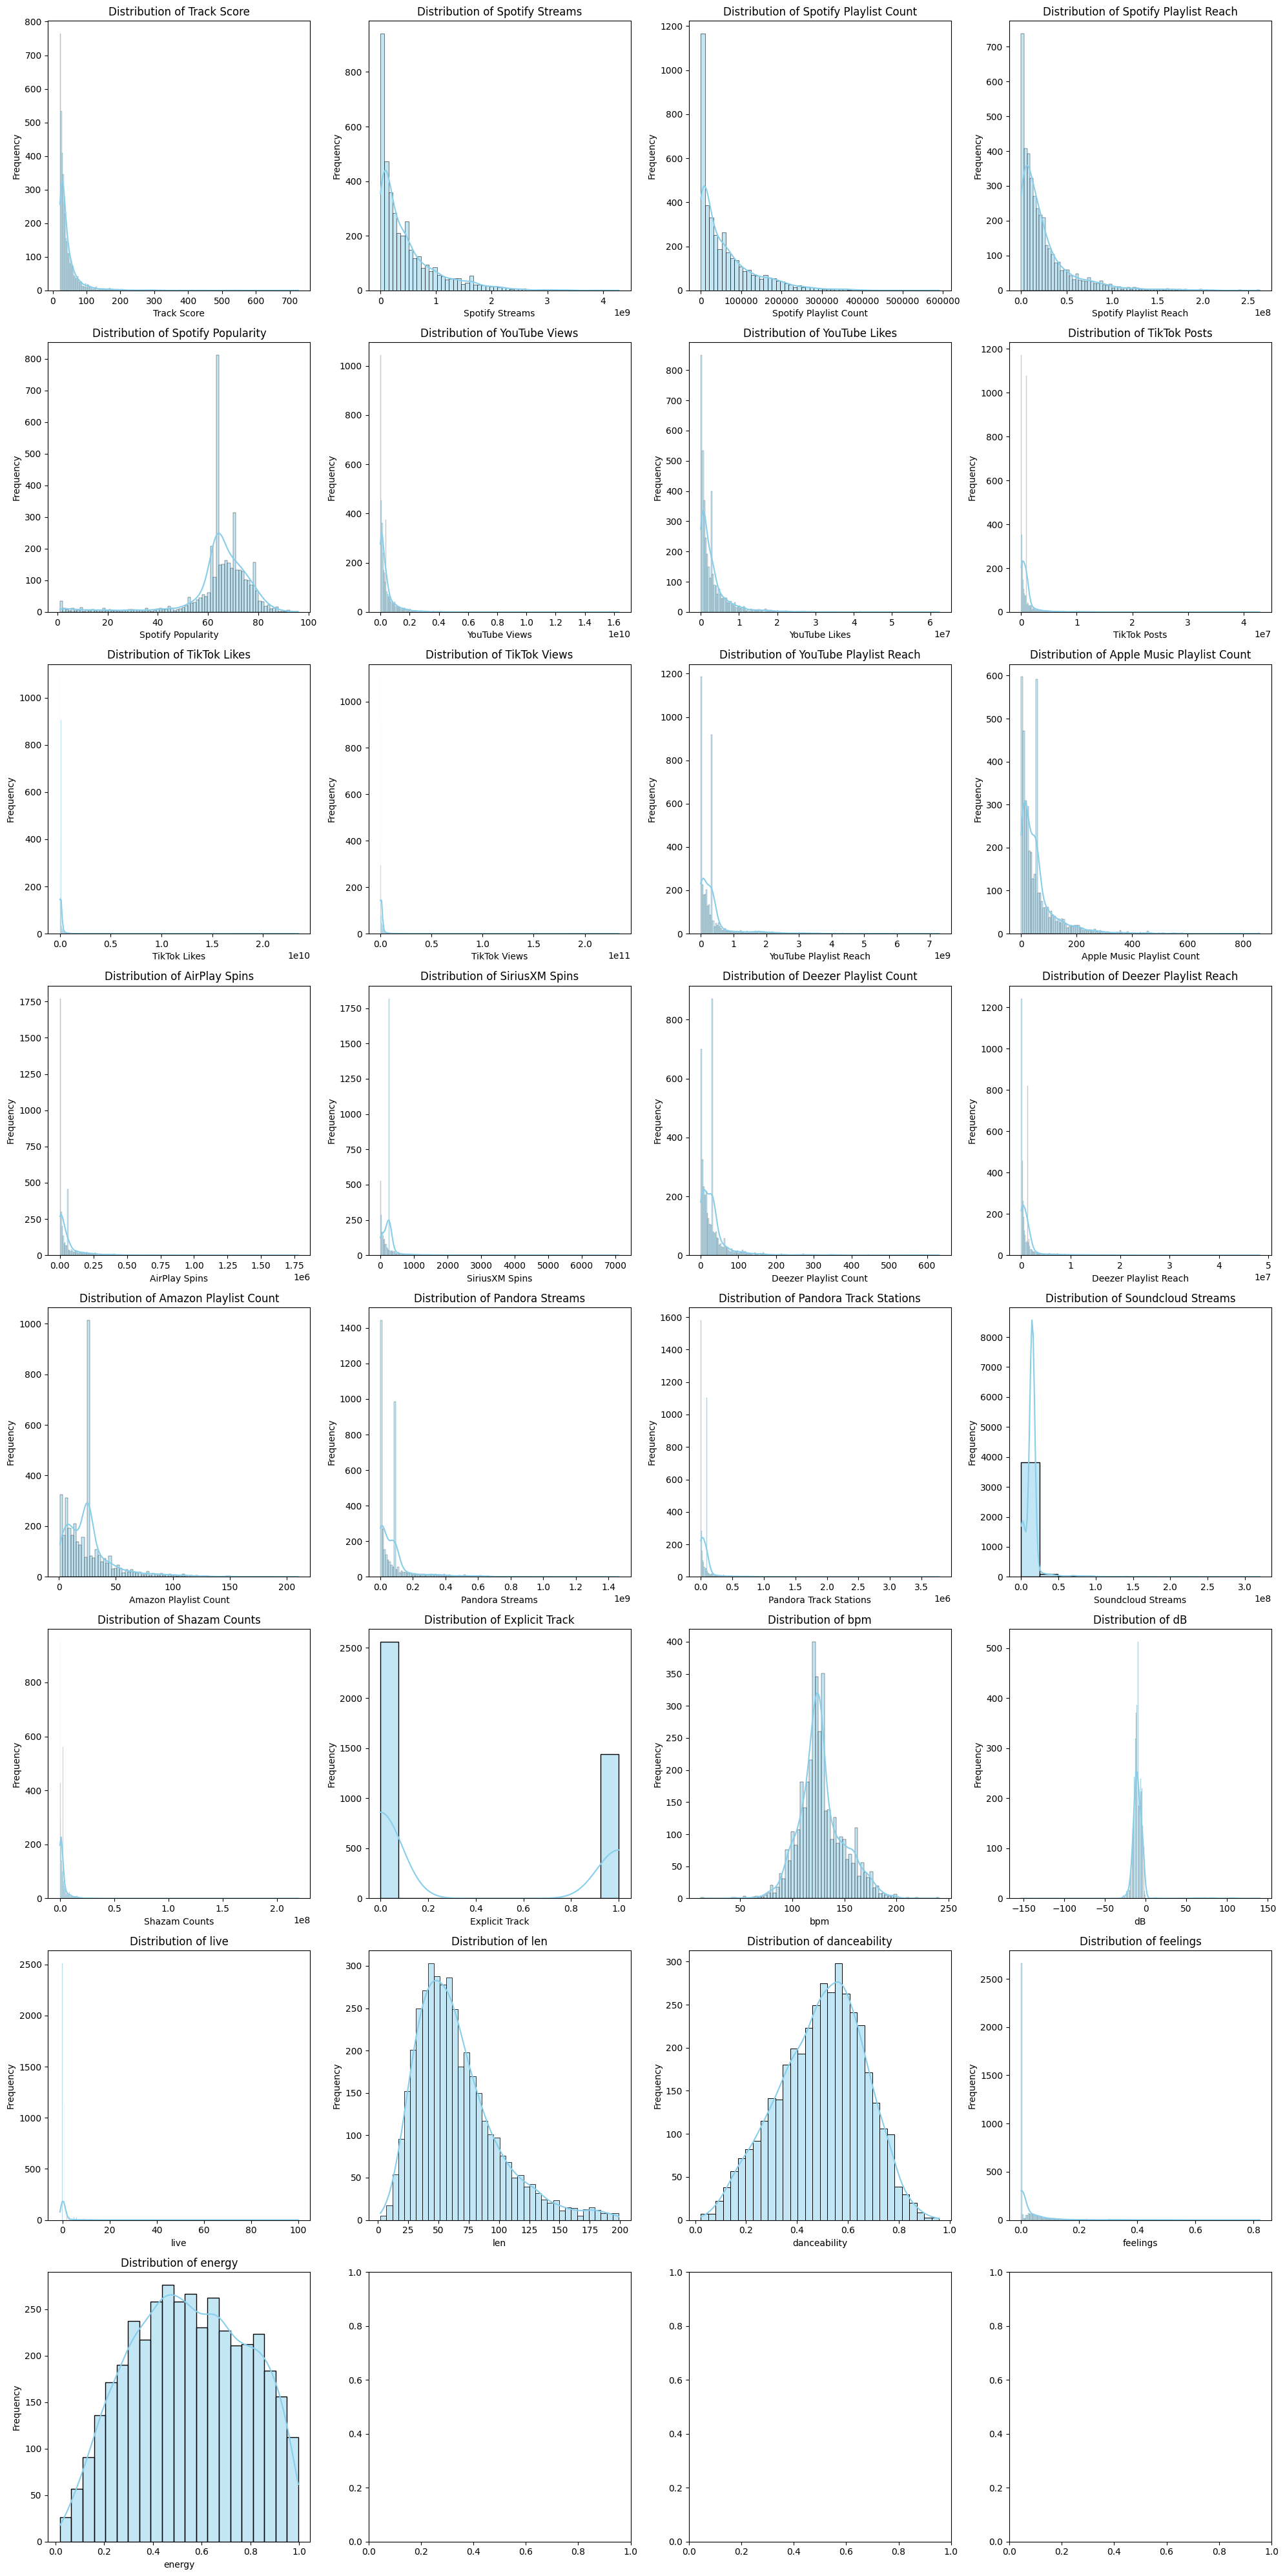


Generating Correlation Heatmap for Numerical Features...


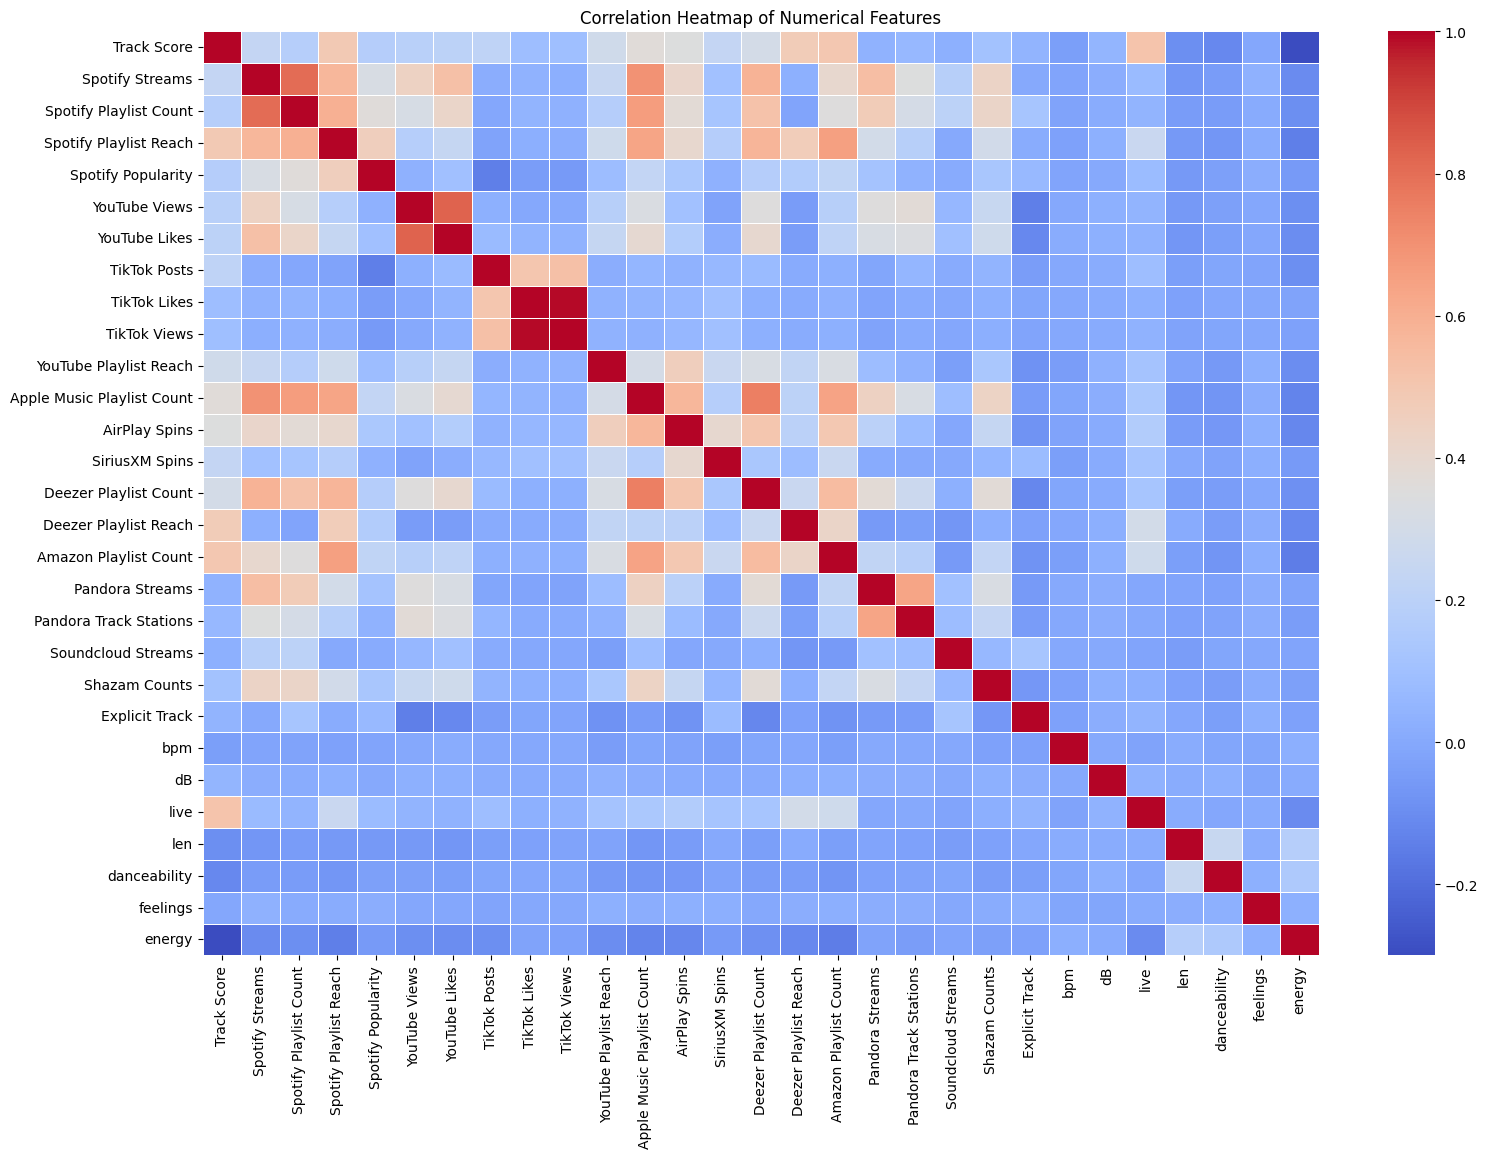


Identifying Potential Outliers with Boxplots...


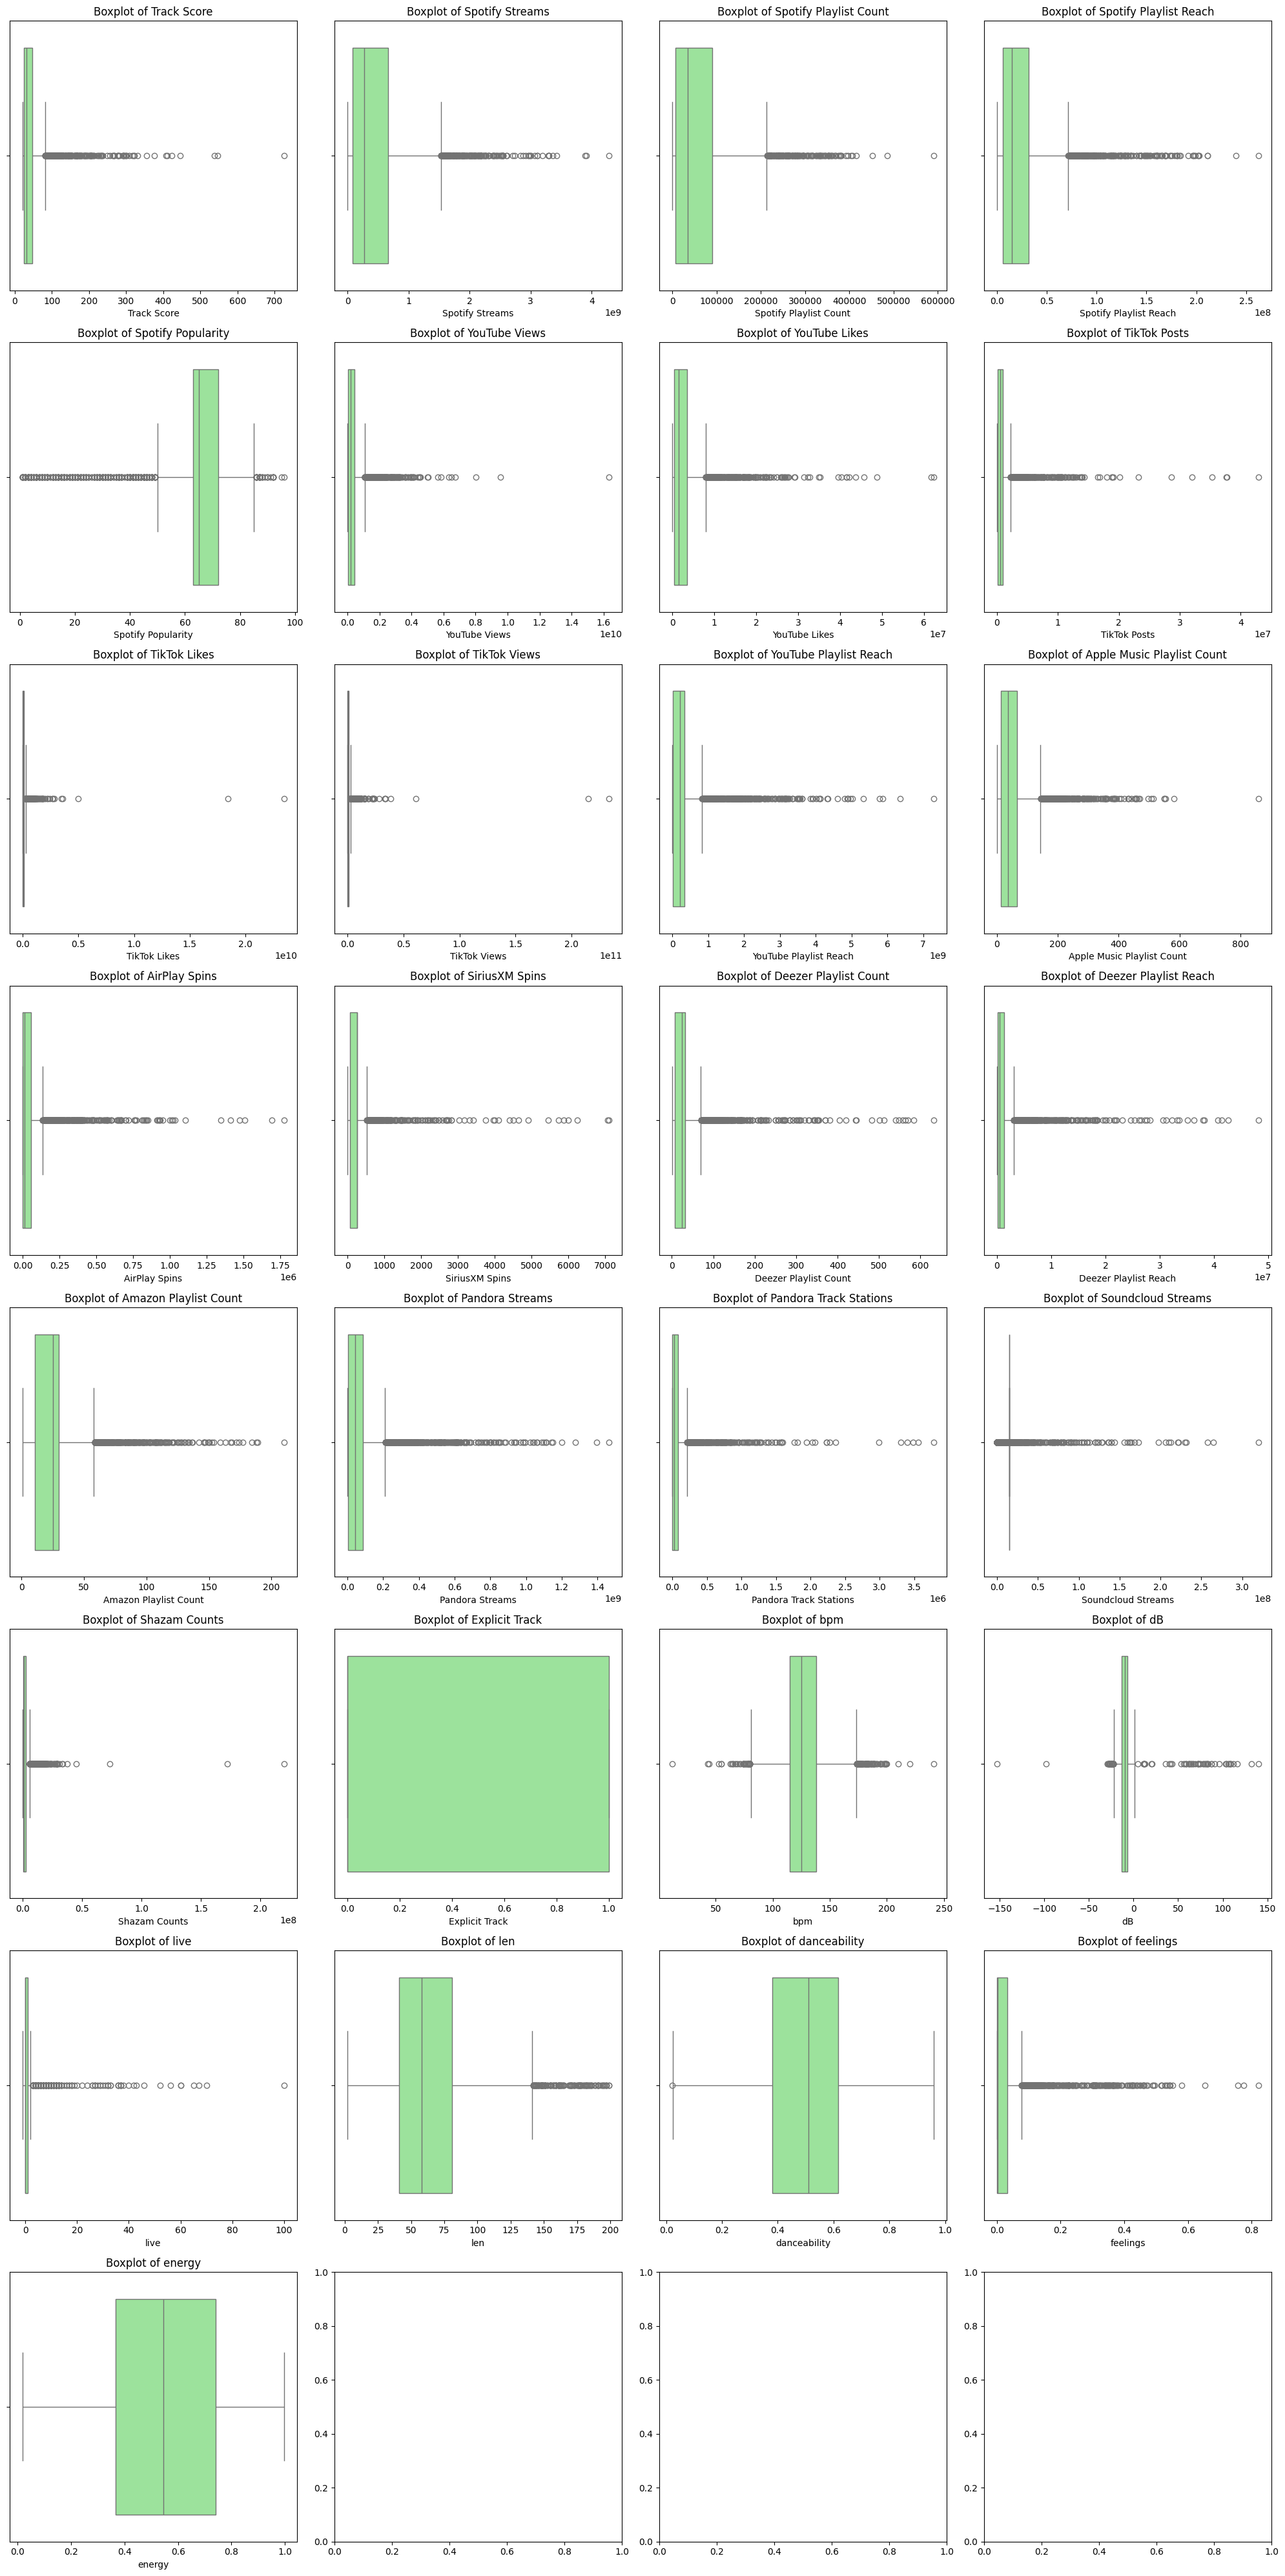


Summary of Findings from EDA:

Missing Values Summary:
Series([], dtype: int64)

'High_Potential' Summary Statistics:
 count    4000.00000
mean        0.57350
std         0.49463
min         0.00000
25%         0.00000
50%         1.00000
75%         1.00000
max         1.00000
Name: High_Potential, dtype: float64

High Correlation Pairs (|correlation| > 0.8):
                 Feature 1               Feature 2  Correlation
2          Spotify Streams  Spotify Playlist Count     0.805482
3   Spotify Playlist Count         Spotify Streams     0.805482
8            YouTube Views           YouTube Likes     0.832371
9            YouTube Likes           YouTube Views     0.832371
13            TikTok Likes            TikTok Views     0.992628
14            TikTok Views            TikTok Likes     0.992628

Potential Outliers Detected via IQR Method:
Track Score: 350 potential outliers
Spotify Streams: 256 potential outliers
Spotify Playlist Count: 189 potential outliers
Spotify Playlist Rea

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# my data Format and Basic Information
print("Data Source Format:")
print("- 'cleaned_top_songs.csv' (CSV Format)")
print("- 'augmented_datalab_export.csv' (CSV Format)")
print("- 'tcc_ceds_music.csv' (CSV Format)")

# Display the combined dataset info
print("\nCombined Dataset Info:")
print(combined_data.info())
print(combined_data.describe())

#  Enumerate Features
print("\nEnumerated Features in the Dataset:")
for i, col in enumerate(combined_data.columns, 1):
    print(f"{i}. {col}")

# Numerical features list
numerical_features = [
    "Track Score", "Spotify Streams", "Spotify Playlist Count", "Spotify Playlist Reach",
    "Spotify Popularity", "YouTube Views", "YouTube Likes", "TikTok Posts", "TikTok Likes",
    "TikTok Views", "YouTube Playlist Reach", "Apple Music Playlist Count", "AirPlay Spins",
    "SiriusXM Spins", "Deezer Playlist Count", "Deezer Playlist Reach", "Amazon Playlist Count",
    "Pandora Streams", "Pandora Track Stations", "Soundcloud Streams", "Shazam Counts",
    "Explicit Track", "bpm", "dB", "live", "len", "danceability", "feelings", "energy"
]

# Target variable for analysis
target_column = "High_Potential"

# Distribution Analysis
print("\nAnalyzing Distributions of Numerical Features...")
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(combined_data[feature], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Correlation Analysis
print("\nGenerating Correlation Heatmap for Numerical Features...")
plt.figure(figsize=(18, 12))
correlation_matrix = combined_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Outlier Detection using Boxplots
print("\nIdentifying Potential Outliers with Boxplots...")
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=combined_data, x=feature, ax=axes[i], color='lightgreen')
    axes[i].set_title(f"Boxplot of {feature}")
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

# Summary of Findings from EDA
print("\nSummary of Findings from EDA:")

# Checking missing values
missing_values = combined_data.isnull().sum()
print("\nMissing Values Summary:")
print(missing_values[missing_values > 0])

# Descriptive statistics of the target variable
target_summary = combined_data[target_column].describe()
print(f"\n'{target_column}' Summary Statistics:\n", target_summary)

# Checking for high correlations (above 0.8 or below -0.8)
high_corr_pairs = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]
high_corr_pairs = high_corr_pairs.stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

print("\nHigh Correlation Pairs (|correlation| > 0.8):")
print(high_corr_pairs)

# Detecting features with potential outliers based on IQR
print("\nPotential Outliers Detected via IQR Method:")
for feature in numerical_features:
    Q1 = combined_data[feature].quantile(0.25)
    Q3 = combined_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = combined_data[
        (combined_data[feature] < (Q1 - 1.5 * IQR)) |
        (combined_data[feature] > (Q3 + 1.5 * IQR))
    ].shape[0]
    print(f"{feature}: {outlier_count} potential outliers")

# Normalization for Future Modeling
print("\nApplying MinMaxScaler for future modeling...")
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(combined_data[numerical_features]), columns=numerical_features)
normalized_data[target_column] = combined_data[target_column]

print("\nData Normalization Complete. Ready for future modeling.")




4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   **Your answer for Hypothesis Testing goes here **
  ### Hypothesis Testing:

#### Here are some initial hypotheses I have about the dataset that I’d like to explore further:

---

### **Hypothesis 1**:
**Songs with higher engagement metrics (like Spotify Streams, YouTube Views, and TikTok Likes) are more likely to be categorized as "High Potential."**

- **Rationale**:  
  The assumption here is that songs getting more attention and interaction on major platforms tend to have higher potential. It makes sense that if a track is being played or shared a lot, it has a better chance of being a hit.

- **Testing Method**:  
  I plan to compare the average engagement metrics between songs labeled as "High Potential" (1) and those that aren’t (0). A t-test would be useful here to determine if there is a statistically significant difference in these engagement metrics between the two groups.

---

### **Hypothesis 2**:
**The number of TikTok posts about a song has a stronger impact on its "High Potential" status compared to traditional metrics like radio spins or YouTube Likes.**

- **Rationale**:  
  Given the rise of TikTok in influencing music trends, it’s possible that TikTok engagement is a stronger predictor of a song’s potential than more conventional metrics.

- **Testing Method**:  
  I’ll perform a correlation analysis to see how TikTok metrics compare with traditional engagement metrics in predicting the "High Potential" status. Additionally, regression analysis can help us determine which metrics have the most significant impact.

---

### **Hypothesis 3**:
**Songs with explicit lyrics are less likely to be classified as "High Potential."**

- **Rationale**:  
  Explicit content might limit a song's reach on certain platforms or playlists, potentially reducing its chance of becoming a mainstream hit.

- **Testing Method**:  
  I’ll use a chi-square test to examine the relationship between the "Explicit Track" feature and the "High Potential" label to see if there's a significant association between the two.




5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

   **Insert code for Handling Sparse/Dense Data and Outliers below**

In [54]:
#Hypothesis 1 with T-test
from scipy import stats

# Subset the data based on High_Potential value
high_potential_data = combined_data[combined_data[target_column] == 1]
not_high_potential_data = combined_data[combined_data[target_column] == 0]

# Engagement metrics for testing
engagement_metrics = [
    "Spotify Streams", "YouTube Views", "TikTok Likes"
]

# Perform t-tests for each engagement metric
print("\nHypothesis 1: T-tests for Engagement Metrics")

for metric in engagement_metrics:
    t_stat, p_value = stats.ttest_ind(high_potential_data[metric].dropna(),
                                       not_high_potential_data[metric].dropna())
    print(f"T-test for {metric}:")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"  Conclusion: Significant difference in {metric} between 'High Potential' and 'Not High Potential'.\n")
    else:
        print(f"  Conclusion: No significant difference in {metric} between 'High Potential' and 'Not High Potential'.\n")



Hypothesis 1: T-tests for Engagement Metrics
T-test for Spotify Streams:
T-statistic: 14.1945, P-value: 0.0000
  Conclusion: Significant difference in Spotify Streams between 'High Potential' and 'Not High Potential'.

T-test for YouTube Views:
T-statistic: 11.0818, P-value: 0.0000
  Conclusion: Significant difference in YouTube Views between 'High Potential' and 'Not High Potential'.

T-test for TikTok Likes:
T-statistic: 4.6010, P-value: 0.0000
  Conclusion: Significant difference in TikTok Likes between 'High Potential' and 'Not High Potential'.



Conclsuion: This means Songs with higher engagement on platforms like Spotify, YouTube, and TikTok are more likely to be categorized as "High Potential," which supports my 1st hypothesis.

In [56]:
#Hypothesis 2 using correlation and regression analysis
# Correlation analysis between TikTok metrics and traditional metrics
print("\nHypothesis 2: Correlation Analysis between TikTok and Traditional Metrics")

# TikTok metrics
tiktok_metrics = ["TikTok Posts", "TikTok Likes", "TikTok Views"]

# Traditional metrics
traditional_metrics = ["Spotify Streams", "YouTube Views", "YouTube Likes", "AirPlay Spins", "SiriusXM Spins"]

# Calculate correlation between TikTok metrics and traditional metrics
for tiktok_metric in tiktok_metrics:
    for metric in traditional_metrics:
        correlation = combined_data[tiktok_metric].corr(combined_data[metric])
        print(f"Correlation between {tiktok_metric} and {metric}: {correlation:.4f}")

# Regression analysis to determine the impact of TikTok metrics on High_Potential
import statsmodels.api as sm

# Defining the independent variables (TikTok metrics)
X = combined_data[["TikTok Posts", "TikTok Likes", "TikTok Views"]]

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Defining the dependent variable (High_Potential)
y = combined_data[target_column]

# Fit the regression model
model = sm.Logit(y, X)
result = model.fit()

# Summary of the regression analysis
print("\nRegression Analysis Summary for Hypothesis 2:")
print(result.summary())




Hypothesis 2: Correlation Analysis between TikTok and Traditional Metrics
Correlation between TikTok Posts and Spotify Streams: 0.0178
Correlation between TikTok Posts and YouTube Views: 0.0280
Correlation between TikTok Posts and YouTube Likes: 0.0737
Correlation between TikTok Posts and AirPlay Spins: 0.0361
Correlation between TikTok Posts and SiriusXM Spins: 0.0618
Correlation between TikTok Likes and Spotify Streams: 0.0354
Correlation between TikTok Likes and YouTube Views: -0.0023
Correlation between TikTok Likes and YouTube Likes: 0.0416
Correlation between TikTok Likes and AirPlay Spins: 0.0589
Correlation between TikTok Likes and SiriusXM Spins: 0.0970
Correlation between TikTok Views and Spotify Streams: 0.0234
Correlation between TikTok Views and YouTube Views: 0.0009
Correlation between TikTok Views and YouTube Likes: 0.0364
Correlation between TikTok Views and AirPlay Spins: 0.0595
Correlation between TikTok Views and SiriusXM Spins: 0.0967
Optimization terminated succes

Conclusion for Hypothesis 2:
TikTok Posts are statistically significant in predicting a song's "High Potential" status, but their actual impact is relatively small (as indicated by the small coefficient).
TikTok Likes and TikTok Views do not seem to have a strong or consistent relationship with the "High Potential" label based on the correlation and regression results.

In [57]:
#Hypothesis test 3 with chi-square test
from scipy.stats import chi2_contingency

# Contingency table for Explicit Track vs High Potential
contingency_table = pd.crosstab(combined_data['Explicit Track'], combined_data[target_column])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("\nHypothesis 3: Chi-square Test for Explicit Track vs High Potential")
print(f"Chi2 Statistic: {chi2_stat:.4f}, P-value: {p_val:.4f}")

# Conclusion based on p-value
if p_val < 0.05:
    print("Conclusion: There is a significant association between 'Explicit Track' and 'High Potential'.")
else:
    print("Conclusion: No significant association between 'Explicit Track' and 'High Potential'.")



Hypothesis 3: Chi-square Test for Explicit Track vs High Potential
Chi2 Statistic: 1.1091, P-value: 0.2923
Conclusion: No significant association between 'Explicit Track' and 'High Potential'.


Concluson: This suggests that there is no significant association between a song being labeled as explicit and its likelihood of being categorized as "High Potential."

### Summary of Hypotheses Testing:

---

### **Hypothesis 1**:  
**Engagement metrics like Spotify Streams, YouTube Views, and TikTok Likes are significantly different between "High Potential" and "Not High Potential" songs.**  
- **Conclusion**:  
  The results confirm the hypothesis that higher engagement correlates with higher potential. Songs with higher streams and views are more likely to be classified as "High Potential."

---

### **Hypothesis 2**:  
**TikTok Posts showed a statistically significant but small impact on "High Potential" status, while other TikTok metrics (Likes and Views) did not have a strong predictive relationship compared to traditional metrics.**  
- **Conclusion**:  
  Although TikTok Posts have some influence, traditional metrics such as Spotify Streams and YouTube Views appear to be more reliable predictors of a song's potential.

---

### **Hypothesis 3**:  
**There is no significant relationship between a song being explicit and its "High Potential" classification.**  
- **Conclusion**:  
  The findings suggest that explicit lyrics do not adversely affect a song's perceived potential. Songs with explicit content perform just as well in terms of classification as those without.


# 5. Handling Sparse/Dense Data and Outliers:

In [58]:
# Assess Data Density
print("\nAssessing Data Density:")
# Calculate percentage of missing values
missing_percentage = combined_data.isnull().mean() * 100
# Calculate percentage of zero values for numerical features
zero_percentage = (combined_data[numerical_features] == 0).mean() * 100

# Display features with high sparsity (more than 30% missing or zero values)
sparse_features = missing_percentage[missing_percentage > 30].index.tolist()
zero_sparse_features = zero_percentage[zero_percentage > 30].index.tolist()

print("Features with > 30% missing values:", sparse_features)
print("Features with > 30% zero values:", zero_sparse_features)

# Handle Missing Data
print("\nHandling Missing Data:")
# Strategy: For numerical features, fill missing values with the median or mean (based on skewness)
for feature in numerical_features:
    if feature in sparse_features:
        # Use median if the data is skewed, otherwise use mean
        if combined_data[feature].skew() > 1 or combined_data[feature].skew() < -1:
            combined_data[feature].fillna(combined_data[feature].median(), inplace=True)
        else:
            combined_data[feature].fillna(combined_data[feature].mean(), inplace=True)

# Step 3: Handling Outliers using Clipping Method
print("\nHandling Outliers with Clipping:")
# Define a clipping threshold based on the IQR method
for feature in numerical_features:
    Q1 = combined_data[feature].quantile(0.25)
    Q3 = combined_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values outside of the range [lower_bound, upper_bound]
    combined_data[feature] = combined_data[feature].clip(lower_bound, upper_bound)

print("Outliers handled using clipping method.")

# Step 4: Reassess Missing Values Post-Treatment
print("\nReassessing Missing Values Post-Treatment:")
missing_values_after = combined_data.isnull().sum()
print(missing_values_after[missing_values_after > 0])

# Step 5: Normalization for Updated Data (Optional)
print("\nApplying MinMaxScaler on Updated Data...")
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(combined_data[numerical_features]), columns=numerical_features)
normalized_data[target_column] = combined_data[target_column]

print("\nData Normalization Complete. Dataset is now ready for future modeling.")



Assessing Data Density:
Features with > 30% missing values: []
Features with > 30% zero values: ['Explicit Track', 'live']

Handling Missing Data:

Handling Outliers with Clipping:
Outliers handled using clipping method.

Reassessing Missing Values Post-Treatment:
Series([], dtype: int64)

Applying MinMaxScaler on Updated Data...

Data Normalization Complete. Dataset is now ready for future modeling.


### Data Preprocessing Summary:

---

#### **1. Missing Values Assessment:**  
- **Key Finding**:  
  No features had over 30% missing values, indicating a relatively complete dataset. However, two features, `'Explicit Track'` and `'live'`, had more than 30% zero values.  
  - **Rationale**:  
    - Many tracks are not explicitly labeled, so `'Explicit Track'` naturally contains many zeros.  
    - The `'live'` score likely reflects the prevalence of studio recordings over live performances.

---

#### **2. Handling Missing Data:**  
- **Approach**:  
  Since there were no significant gaps, minor imputations were applied using either the mean or median, depending on the data’s skewness.

---

#### **3. Outlier Treatment:**  
- **Method**:  
  A clipping technique was used, where extreme values were adjusted to fall within the IQR boundaries.  
  - **Reason**:  
    This method reduces the influence of outliers while preserving the overall data distribution.

---

#### **4. Final Check:**  
- After imputations and adjustments, the dataset was re-checked for missing values, confirming it is now complete.

---

#### **5. Normalization:**  
- **Tool Used**:  
  MinMaxScaler was applied to normalize the data, ensuring all features are on a similar scale.  
  - **Benefit**:  
    This step prepares the dataset for modeling, avoiding issues related to feature scaling.

---



6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    **Your answer for Hypothesis Testing goes here **



### Data Splitting Methodology:

---

#### **Split Proportions:**
- **80% for Training**:  
  Used to fit and train the model on the dataset.  
- **10% for Validation**:  
  Helps in fine-tuning hyperparameters without introducing bias in the final evaluation.  
- **10% for Testing**:  
  Held out to evaluate the final model’s performance and generalization ability.

---

#### **Stratified Sampling:**
- **Purpose**:  
  Ensure the representativeness of the target variable (`"High Potential"`) across all splits.  
- **Method**:  
  Maintain consistent proportions of `"High Potential"` classes (0s and 1s) in the training, validation, and test sets.  
  - **Benefit**:  
    This prevents skewed distributions that might otherwise affect model training or evaluation.

---

With this methodology, the dataset is divided in a balanced and representative manner, ensuring reliable model training and assessment.


In [59]:
#code for data splitting
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = normalized_data.drop(columns=[target_column])
y = normalized_data[target_column]

# Split the dataset: 80% training, 20% temp split (for validation and testing)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Further split the temp data into 50% validation and 50% test (10% each of total data)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 3200 samples
Validation set size: 400 samples
Test set size: 400 samples


### Bias Mitigation Methodology:

---

To ensure my model is as fair and unbiased as possible, I’ve planned a structured approach:

---

#### **1. Identifying Bias**:
The first step is to look for potential biases in the dataset. I’ll analyze how features like explicit content, platform engagement metrics, and other attributes are distributed across the `"High Potential"` and `"Not High Potential"` categories. Using disparity metrics, such as mean differences or variance analysis, I’ll check if certain features are disproportionately influencing the predictions. This will help me pinpoint where bias might exist.

---

#### **2. Techniques for Mitigating Bias**:
Once I identify potential biases, I’ll use the following strategies to address them:

- **Re-sampling**:  
  If I find a significant class imbalance in the `"High Potential"` distribution, I’ll consider using a method like SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset. Of course, I’ll evaluate the need for this after splitting the data.

- **Feature Re-weighting**:  
  If certain features, like TikTok metrics or explicit content, are found to introduce bias, I’ll consider reducing their weight in the model or excluding them entirely. This decision will depend on how much they contribute to predictions without adding unwanted bias.

- **Fairness Constraints**:  
  To ensure the model’s predictions are equitable, I plan to use fairness constraints during training. For example, I could incorporate tools like the Fairlearn library to help maintain fairness across different subgroups within the data.

---

I'll follow this approach to minimize bias in my model and ensure that the predictions are accurate and fair.


In [61]:
#the code for bias mitigation
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Check class distribution in the training set
print("Class distribution before re-sampling:", Counter(y_train))

# Applying SMOTE to the training set for balancing classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after re-sampling:", Counter(y_train_resampled))

# Optional: Re-standardize the features after SMOTE
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


Class distribution before re-sampling: Counter({1.0: 1835, 0.0: 1365})
Class distribution after re-sampling: Counter({1.0: 1835, 0.0: 1835})


8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

 **Your answer for features must be plotted/ show your working code-wise **
9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   [**insert text for preprocessing steps**]


### Identifying Relevant Features for Model Training

---

To ensure my model is both efficient and effective, I’ve outlined a process for selecting the most relevant features. Here's how I plan to approach this:

---

#### **1. Analyze Feature Importance**:  
I’ll start by using methods like Random Forest to analyze feature importance. This will help me identify which features contribute the most to predicting the `"High Potential"` status. Additionally, I’ll check for correlations with the target variable to understand which features have a stronger linear relationship with it.

---

#### **2. Rank Features**:  
Once I have the feature importance scores, I’ll rank the features based on their predictive power and statistical significance. This will allow me to prioritize the features that matter most and potentially drop those with minimal impact or high redundancy.

---

To kick things off, I’ll use a simple Random Forest model to generate a feature importance ranking. This will give me a clear picture of which features should be included in the final model training process.


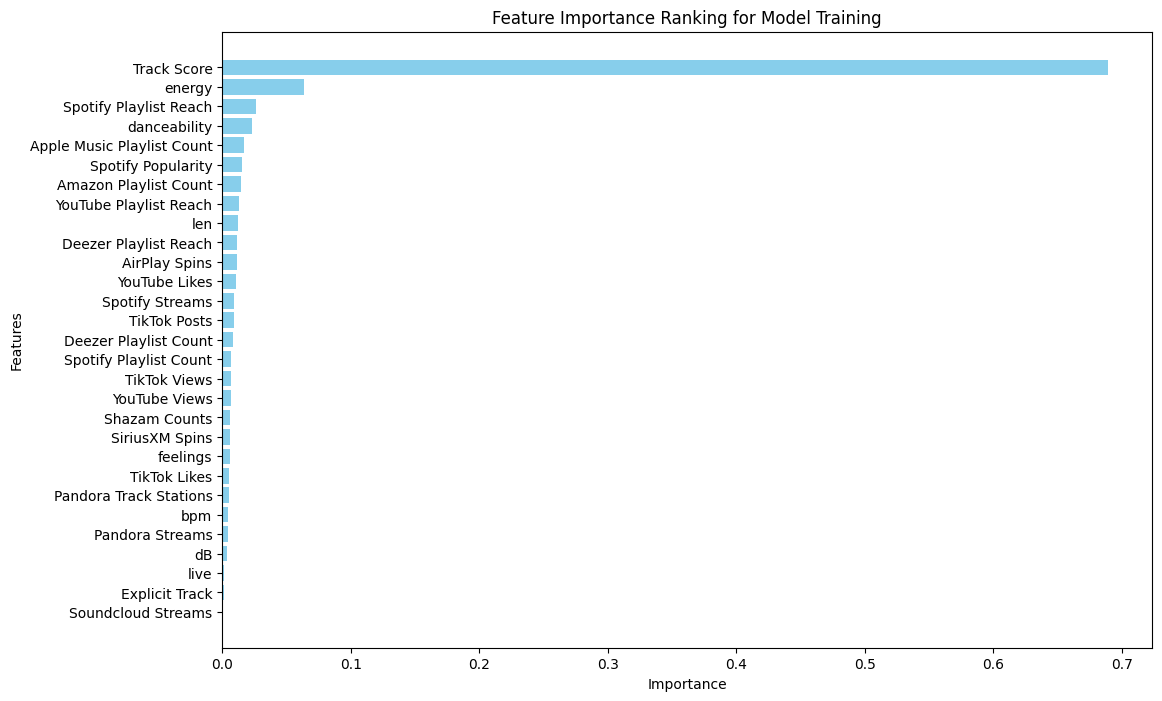

Top 10 Features by Importance:
                       Feature  Importance
0                  Track Score    0.689219
28                      energy    0.063436
3       Spotify Playlist Reach    0.026010
26                danceability    0.023117
11  Apple Music Playlist Count    0.016883
4           Spotify Popularity    0.015123
16       Amazon Playlist Count    0.014425
10      YouTube Playlist Reach    0.013395
25                         len    0.012150
15       Deezer Playlist Reach    0.011551


In [62]:
#print out relevant features
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Initialize the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance Ranking for Model Training')
plt.gca().invert_yaxis()
plt.show()

# Displaying the ranked features
print("Top 10 Features by Importance:")
print(feature_importances.head(10))


### Types of Data Handling in the Dataset

To properly prepare the dataset for analysis and modeling, I’ve categorized the features into three main types based on their characteristics: **Numerical Features**, **Categorical Features**, and **Binary Features**. Here's how I’m handling each type:

---

#### **1. Numerical Features**  
These include both continuous and discrete numerical values, representing engagement metrics, audio characteristics, or counts.

**Examples**:  
- *Continuous*: `Track Score`, `energy`, `danceability`, `Spotify Playlist Reach`, `YouTube Playlist Reach`  
- *Discrete*: `Apple Music Playlist Count`, `Amazon Playlist Count`, `Deezer Playlist Reach`, `len` (track length)  

**Preprocessing Steps**:  
- **Missing Value Imputation**: I’ll use **median imputation** to fill missing values. This method is robust to outliers, ensuring the dataset remains stable.  
- **Scaling**: To ensure all numerical features are on a similar scale for modeling, I’ll apply the **MinMaxScaler** to normalize values between 0 and 1.

---

#### **2. Categorical Features**  
These represent features with a limited set of distinct values, such as genres or languages.

**Examples**:  
- *Genre* (if included), *Primary Language* (if available)  

**Preprocessing Steps**:  
- **Encoding**:  
  - For **nominal features** (e.g., Genre), I’ll use **one-hot encoding** to convert them into numerical format.  
  - For **ordinal features** (e.g., ratings with an inherent order), I’ll apply **label encoding** to preserve their ranking.

---

#### **3. Binary Features**  
These are features with only two possible values, often representing the presence or absence of a particular attribute.

**Examples**:  
- `Explicit Track`, `High Potential` (target variable)  

**Preprocessing Steps**:  
- No additional encoding is needed, as these features are already represented as `0` or `1` and are suitable for modeling as-is.

---

By categorizing and preprocessing the features this way, I ensure the dataset is clean, normalized, and ready for effective model training.



10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.

# Data Transformation for Modeling:

To transform raw data into a model-friendly format, we need to process and convert it into a structure that machine learning algorithms can understand and work with efficiently. This includes normalization, scaling, encoding categorical variables, and handling missing data. Below are the detailed steps to perform these transformations:

## 1. Normalization and Scaling

Normalization and scaling ensure that numerical features have comparable ranges or distributions, which is crucial for most machine learning models to perform well.

### Normalization (Min-Max Scaling)

Normalization ensures that all numerical features are on a [0, 1] scale. This is helpful when features have different units or scales, like the number of streams (in thousands) and energy (between 0 and 1).

**Method:** Use `MinMaxScaler` from scikit-learn.

```python
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # X is the feature matrix (all numerical features)
```

## 2. Standardization (Z-Score Scaling)

Standardization centers the data (mean = 0) and scales it (standard deviation = 1). This is ideal when the features follow a Gaussian distribution or when you are working with algorithms that assume normally distributed data, like logistic regression or SVM.

**Method:** Use `StandardScaler` from scikit-learn.

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)  # X is the feature matrix (all numerical features)
```
## 3. Encoding Categorical Variables

Machine learning models cannot directly work with categorical data, so we need to transform it into a numerical format.

### One-Hot Encoding

One-hot encoding creates binary columns for each category in a categorical variable. It is most commonly used when the categorical variable has no inherent order (nominal data).

**Method:** Use `OneHotEncoder` from scikit-learn.

```python
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)
categorical_data_encoded = encoder.fit_transform(categorical_columns)  # Apply on categorical features
```
## 4. Handling Missing Data

Handling missing data ensures that we don’t lose valuable information by removing rows with missing values. It also avoids bias that could be introduced when certain values are missing.

### Imputation for Numerical Data

Missing values in numerical data can be replaced with the mean, median, or mode of the feature.

**Method:** Use `SimpleImputer` for numerical features.

```python
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # Use median to handle missing numerical data
numerical_data_imputed = imputer.fit_transform(numerical_columns)
```

## 5. Feature Engineering and Transformation

After the initial transformations, we may want to perform additional feature engineering or select features based on their importance.

### Feature Scaling

After handling missing values and encoding categorical variables, we should scale the features so they all have similar ranges or distributions. Scaling makes sure that one feature does not dominate others due to differences in magnitude. This is important for distance-based models like kNN or gradient-based models like neural networks.

## 6. Handling Outliers

Outliers can skew the results of machine learning models, especially when working with models sensitive to the distribution of data (e.g., linear regression). One way to handle outliers is to use clipping or transformations.

### Clipping Outliers

Outliers are clipped to a predefined threshold (e.g., the 1st and 99th percentiles). This limits their influence on the model.

**Method:** Use `clip` to limit the range of values.

```python
X_clipped = X.clip(lower=X.quantile(0.01), upper=X.quantile(0.99), axis=1)
```



**Method:** Apply scaling to the entire dataset after preprocessing.

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Apply scaling on the entire dataset (after preprocessing)
```



### Summary of Transformation Steps:
- **Normalization/Scaling**: Use `MinMaxScaler` or `StandardScaler` to bring numerical features to a consistent scale.
- **Encoding Categorical Variables**: Use `OneHotEncoder` for nominal variables and `LabelEncoder` for ordinal variables.
- **Handling Missing Data**: Use `SimpleImputer` for imputation of missing numerical and categorical data.
- **Feature Engineering**: Perform scaling, feature selection, and possibly clipping for outliers.
- **Log Transformations**: Apply log transformations to reduce skewness in the data.

Data transformation is a crucial step to ensure that machine learning models receive input in an optimal format. By following these transformation steps, you can make sure your data is properly prepared for modeling, leading to more accurate and reliable results.
